In [1]:
# From http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft
%matplotlib inline

In this example we use the Hilbert transform to determine the amplitude envelope and instantaneous frequency of an amplitude-modulated signal.

In [5]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ts = 1.0/fs
print ts

0.0025


We create a chirp of which the frequency increases from 20 Hz to 100 Hz and apply an amplitude modulation.

In [3]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= ( 1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

The amplitude envelope is given by magnitude of the analytic signal. The instantaneous frequency can be obtained by differentiating the instantaneous phase in respect to time. The instantaneous phase corresponds to the phase angle of the analytic signal.

In [4]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0*np.pi) * fs

(0.0, 120.0)

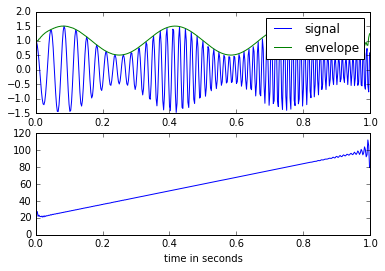

In [8]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

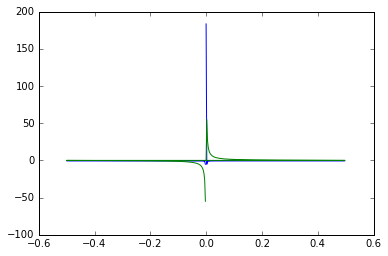

In [6]:
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

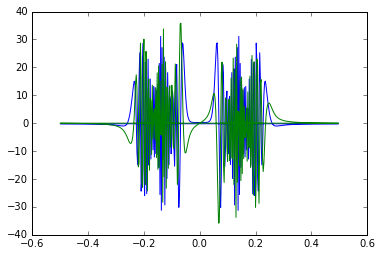

In [7]:
fsig = np.fft.fft(signal)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, fsig.real, freq, fsig.imag)

In [36]:
N = len(signal)
p = np.arange(N)
T = N/fs
fullfreq = p/T 
posfreq = fullfreq[range(N/2)]
print N,T,fs

400 1.0 400.0


In [37]:
Fsignal = np.fft.fft(signal)/N
Fsignal = Fsignal[range(N/2)]

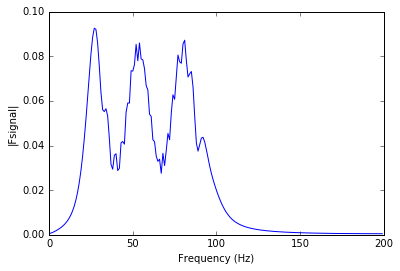

In [38]:
plt.plot(posfreq, abs(Fsignal), '-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Fsignal|')

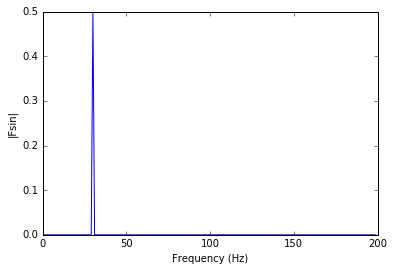

In [41]:
myfreq=30 # Hz
mysinw = np.sin(2*np.pi*myfreq*t)
Fsin = np.fft.fft(mysinw/N)
Fsin = Fsin[range(N/2)]
plt.plot(posfreq, abs(Fsin), '-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Fsin|')

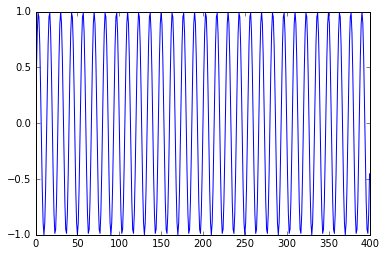

In [40]:
plt.plot(mysinw)

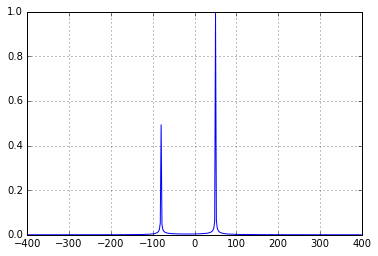

In [43]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

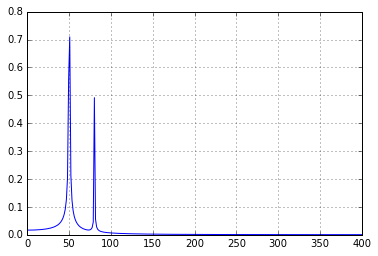

In [44]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

In [45]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ts = 1.0/fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= ( 1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

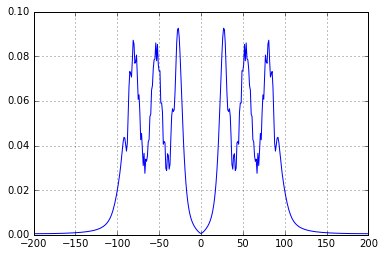

In [47]:
x = np.linspace(0.0,samples*ts,samples)
yf = fft(signal)
xf = fftfreq(samples, ts)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/samples * np.abs(yplot))
plt.grid()
plt.show()

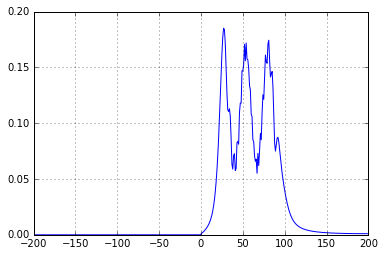

In [48]:
analytic_signal = hilbert(signal)
yf = fft(analytic_signal)
xf = fftfreq(samples, ts)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0/samples * np.abs(yplot))
plt.grid()
plt.show()